REBNCONV - after conv: torch.Size([4, 64, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([4, 64, 256, 256])
  ChannelAttention - output: torch.Size([4, 64, 1, 1])
  SpatialAttention - input: torch.Size([4, 64, 256, 256])
  SpatialAttention - output: torch.Size([4, 1, 256, 256])
  ECA - input: torch.Size([4, 64, 256, 256])
  ECA - output: torch.Size([4, 64, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([4, 64, 256, 256])
REBNCONV - after conv: torch.Size([4, 32, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([4, 32, 256, 256])
  ChannelAttention - output: torch.Size([4, 32, 1, 1])
  SpatialAttention - input: torch.Size([4, 32, 256, 256])
  SpatialAttention - output: torch.Size([4, 1, 256, 256])
  ECA - input: torch.Size([4, 32, 256, 256])
  ECA - output: torch.Size([4, 32, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([4, 32, 256, 

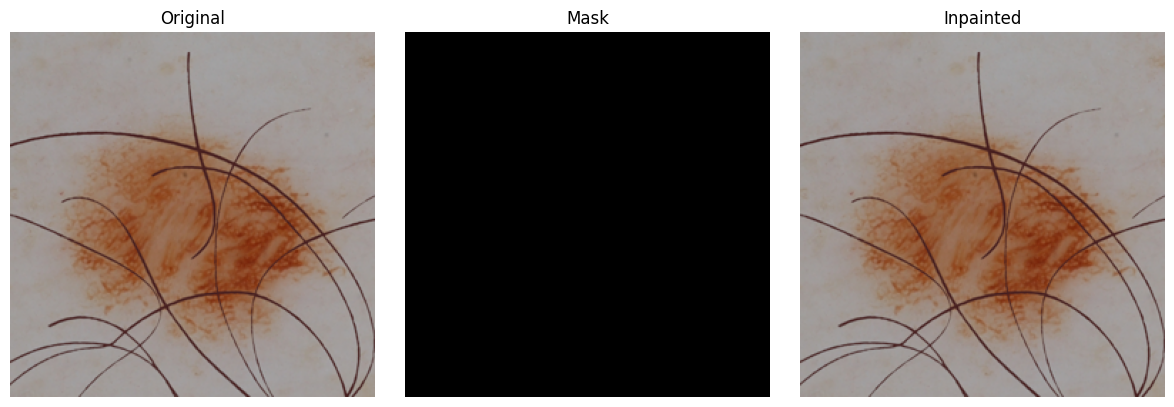

REBNCONV - after conv: torch.Size([1, 64, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 64, 256, 256])
  ChannelAttention - output: torch.Size([1, 64, 1, 1])
  SpatialAttention - input: torch.Size([1, 64, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 64, 256, 256])
  ECA - output: torch.Size([1, 64, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([1, 64, 256, 256])
REBNCONV - after conv: torch.Size([1, 32, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 32, 256, 256])
  ChannelAttention - output: torch.Size([1, 32, 1, 1])
  SpatialAttention - input: torch.Size([1, 32, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 32, 256, 256])
  ECA - output: torch.Size([1, 32, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([1, 32, 256, 

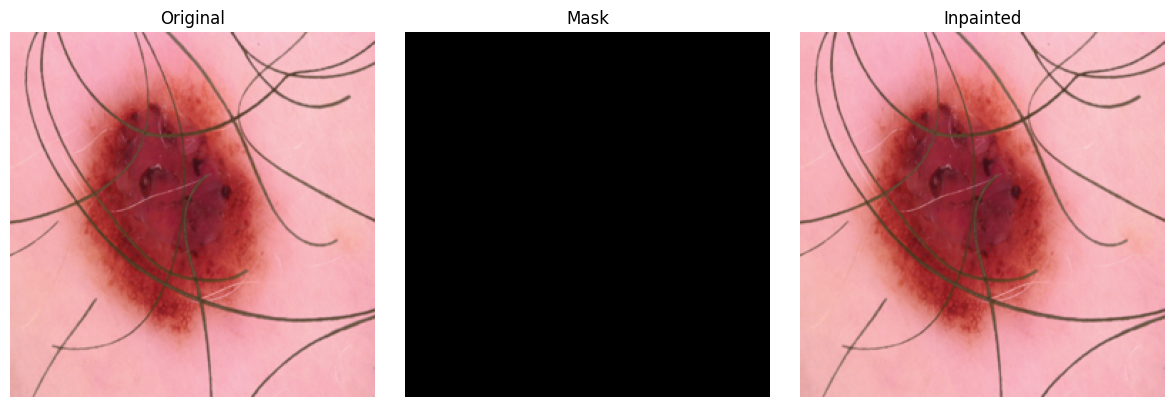

REBNCONV - after conv: torch.Size([1, 64, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 64, 256, 256])
  ChannelAttention - output: torch.Size([1, 64, 1, 1])
  SpatialAttention - input: torch.Size([1, 64, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 64, 256, 256])
  ECA - output: torch.Size([1, 64, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([1, 64, 256, 256])
REBNCONV - after conv: torch.Size([1, 32, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 32, 256, 256])
  ChannelAttention - output: torch.Size([1, 32, 1, 1])
  SpatialAttention - input: torch.Size([1, 32, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 32, 256, 256])
  ECA - output: torch.Size([1, 32, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([1, 32, 256, 

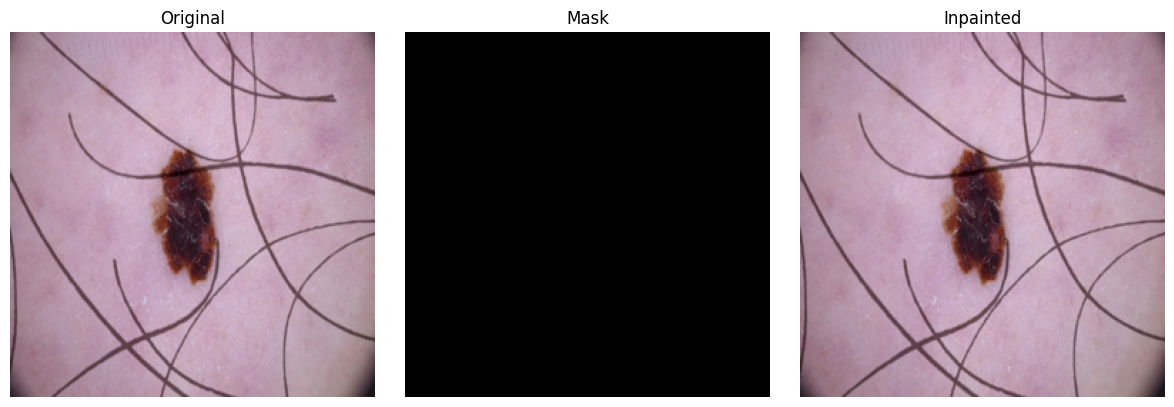

‚öôÔ∏è Debugging Attention Flow
REBNCONV - after conv: torch.Size([1, 64, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 64, 256, 256])
  ChannelAttention - output: torch.Size([1, 64, 1, 1])
  SpatialAttention - input: torch.Size([1, 64, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 64, 256, 256])
  ECA - output: torch.Size([1, 64, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after attention: torch.Size([1, 64, 256, 256])
REBNCONV - after conv: torch.Size([1, 32, 256, 256])

üß© CompositeAttention Block Begin
  ChannelAttention - input: torch.Size([1, 32, 256, 256])
  ChannelAttention - output: torch.Size([1, 32, 1, 1])
  SpatialAttention - input: torch.Size([1, 32, 256, 256])
  SpatialAttention - output: torch.Size([1, 1, 256, 256])
  ECA - input: torch.Size([1, 32, 256, 256])
  ECA - output: torch.Size([1, 32, 256, 256])
üß© CompositeAttention Block End

REBNCONV - after att

In [4]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# ---------- Depthwise Separable Convolution ----------
class SeparableConv2d(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size=3, padding=1, dilation=1, bias=False):
        super().__init__()
        self.depthwise = nn.Conv2d(in_ch, in_ch, kernel_size, padding=padding*dilation,
                                   dilation=dilation, groups=in_ch, bias=bias)
        self.pointwise = nn.Conv2d(in_ch, out_ch, 1, bias=bias)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x

# ---------- Composite Attention (CBAM + ECA) ----------
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_planes, in_planes//ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes//ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        print(f"  ChannelAttention - input: {x.shape}")
        avg = self.fc(self.avg_pool(x))
        mx  = self.fc(self.max_pool(x))
        out = self.sigmoid(avg + mx)
        print(f"  ChannelAttention - output: {out.shape}")
        return out

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.conv2 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.conv3 = nn.Conv2d(1, 1, kernel_size, padding=padding, bias=False)

        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        print(f"  SpatialAttention - input: {x.shape}")
        avg = torch.mean(x, dim=1, keepdim=True)
        mx, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg, mx], dim=1)
        x_sigmoid = self.sigmoid(self.conv(x_cat))
        x_tanh = self.tanh(self.conv2(x_cat))
        x_mul = x_sigmoid * x_tanh
        x_out = self.conv3(x_mul)
        print(f"  SpatialAttention - output: {x_out.shape}")
        return x_out

class ECALayer(nn.Module):
    def __init__(self, channels, k_size=3):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv = nn.Conv1d(1, 1, k_size, padding=(k_size-1)//2, bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        print(f"  ECA - input: {x.shape}")
        y = self.avg_pool(x).squeeze(-1).transpose(-1, -2)  # [B, C, 1] ‚Üí [B, 1, C]
        y = self.conv(y)
        y = self.sigmoid(y).transpose(-1, -2).unsqueeze(-1)  # [B, C, 1, 1]
        out = x * y.expand_as(x)
        print(f"  ECA - output: {out.shape}")
        return out

class CompositeAttention(nn.Module):
    def __init__(self, channels, reduction=8, k_size=3):
        super().__init__()
        self.ca  = ChannelAttention(channels, ratio=reduction)
        self.sa  = SpatialAttention()
        self.eca = ECALayer(channels, k_size)
    def forward(self, x):
        print("\nüß© CompositeAttention Block Begin")
        x = x * self.ca(x)
        x = x * self.sa(x)
        x = self.eca(x)
        print("üß© CompositeAttention Block End\n")
        return x

# ---------- Atrous Spatial Pyramid Pooling ----------
class ASPP(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 1)
        self.conv2 = nn.Conv2d(in_ch, out_ch, 3, padding=6, dilation=6)
        self.conv3 = nn.Conv2d(in_ch, out_ch, 3, padding=12, dilation=12)
        self.conv4 = nn.Conv2d(in_ch, out_ch, 3, padding=18, dilation=18)
        self.pool  = nn.AdaptiveAvgPool2d(1)
        self.pool_conv = nn.Conv2d(in_ch, out_ch, 1)
        self.out   = nn.Conv2d(out_ch*5, out_ch, 1)
        self.bn    = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x4 = self.conv4(x)
        x5 = self.pool(x)
        x5 = self.pool_conv(x5)
        x5 = F.interpolate(x5, size=x4.shape[2:], mode='bilinear', align_corners=False)
        x  = torch.cat([x1, x2, x3, x4, x5], dim=1)
        x  = self.out(x)
        x  = self.bn(x)
        return self.relu(x)

# ---------- Modified U2NET Blocks ----------
class REBNCONV(nn.Module):
    def __init__(self, in_ch, out_ch, dirate=1):
        super().__init__()
        self.conv = nn.Sequential(
            SeparableConv2d(in_ch, out_ch, kernel_size=3, padding=dirate, dilation=dirate),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
        self.att  = CompositeAttention(out_ch)
    def forward(self, x):
        x = self.conv(x)
        print(f"REBNCONV - after conv: {x.shape}")
        x = self.att(x)
        print(f"REBNCONV - after attention: {x.shape}")
        return x

class REBNCONV_NoAtt(nn.Module):
    def __init__(self, in_ch, out_ch, dirate=1):
        super().__init__()
        self.conv = nn.Sequential(
            SeparableConv2d(in_ch, out_ch, kernel_size=3, padding=dirate, dilation=dirate),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.conv(x)

class RSU7(nn.Module):
    def __init__(self, in_ch, mid_ch, out_ch):
        super().__init__()
        # --------  1) ÁºñÁ†ÅÂô® Conv Block (0th Âàó)  --------
        # f0_0: ËæìÂÖ• ‚Üí REBNCONV(in_ch ‚Üí out_ch)
        self.enc0 = REBNCONV(in_ch, out_ch)
        # f1_0: out_ch ‚Üí mid_ch
        self.enc1 = REBNCONV(out_ch, mid_ch)
        self.pool1 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f2_0: mid_ch ‚Üí mid_ch
        self.enc2 = REBNCONV(mid_ch, mid_ch)
        self.pool2 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f3_0: mid_ch ‚Üí mid_ch
        self.enc3 = REBNCONV(mid_ch, mid_ch)
        self.pool3 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f4_0: mid_ch ‚Üí mid_ch
        self.enc4 = REBNCONV(mid_ch, mid_ch)
        self.pool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f5_0: mid_ch ‚Üí mid_ch
        self.enc5 = REBNCONV(mid_ch, mid_ch)
        self.pool5 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f6_0: mid_ch ‚Üí mid_ch
        self.enc6 = REBNCONV(mid_ch, mid_ch)
        self.pool6 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f7_0 (bottleneck): mid_ch ‚Üí mid_ch
        self.enc7 = REBNCONV(mid_ch, mid_ch)

        # --------  2) Ëß£Á†Å & ÂµåÂ•óËûçÂêà Conv Blocks (ÂÖ∂ÂÆÉÂàó)  --------
        # Êàë‰ª¨Áî®‰∏Ä‰∏™ ModuleDict ‰øùÂ≠òÊâÄÊúâ‚ÄúÊãºÊé•Âêé ‚Üí Âç∑ÁßØ‚ÄùÊ≠•È™§ÂØπÂ∫îÁöÑ REBNCONV_NoAtt„ÄÇ
        # ÂÅáËÆæÊàë‰ª¨ÁºñÂè∑ f{i}_{j}ÔºåÂÖ∂‰∏≠ i Ë°®Á§∫ ‚ÄúÊ∑±Â∫¶Á∫ßÂà´‚ÄùÔºåj Ë°®Á§∫‚ÄúÁ¨¨ j Ê¨°ËûçÂêà‚Äù„ÄÇ
        # ËøôÈÉ®ÂàÜ‰∏ÄÂÖ±Ë¶ÅÊûÑÂª∫ 1 Âà∞ 6 Âàó„ÄÅi ‰ªé 0 Âà∞ (7 - j) ÁöÑÊâÄÊúâËûçÂêàËäÇÁÇπ„ÄÇ
        self.dec = nn.ModuleDict()
        for j in range(1, 7):               # j = 1..6
            for i in range(0, 8 - j):      # i = 0..(7-j)
                # ÂÜ≥ÂÆöËæìÂá∫ÈÄöÈÅìÊï∞ÔºöÂΩì j=6 ‰∏î i=0 Êó∂ÔºåËæìÂá∫ out_chÔºàÊúÄÁªàËäÇÁÇπÔºâÔºõÂÖ∂ÂÆÉÊÉÖÂÜµËæìÂá∫ mid_ch„ÄÇ
                out_channels = out_ch if (j == 6 and i == 0) else mid_ch

                # ËÆ°ÁÆóÊãºÊé•ÂêéÁöÑËæìÂÖ•ÈÄöÈÅìÊï∞
                # - f0_1 ÈúÄË¶ÅÊãºÊé• f0_0 (out_ch) ‰∏é up(f1_0)(mid_ch) ‚Üí ÊÄª in_channels = out_ch + mid_ch
                # - f0_j (j>1) ÈúÄË¶ÅÊãºÊé• f0_{j-1}(mid_ch) ‰∏é up(f1_{j-1})(mid_ch) ‚Üí in_channels = mid_ch * 2
                # - f{i>0}_j ÈúÄË¶ÅÊãºÊé• f{i}_{j-1}(mid_ch) ‰∏é up(f{i+1}_{j-1})(mid_ch) ‚Üí in_channels = mid_ch * 2
                if i == 0 and j == 1:
                    in_channels = out_ch + mid_ch
                else:
                    in_channels = mid_ch * 2

                # Áî® REBNCONV_NoAtt ÂÅö‚ÄúÊãºÊé•Âêé ‚Üí Âç∑ÁßØ‚Äù
                self.dec[f"{i}_{j}"] = REBNCONV_NoAtt(in_channels, out_channels)

    def forward(self, x):
        # --------  1) ÁºñÁ†ÅÈò∂ÊÆµ (0th Âàó)Ôºö ËÆ°ÁÆó f0_0, f1_0, ‚Ä¶, f7_0  --------
        f0_0 = self.enc0(x)                   # [B, out_ch, H, W]
        f1_0 = self.enc1(f0_0)                # [B, mid_ch, H, W]
        f2_0 = self.enc2(self.pool1(f1_0))    # [B, mid_ch, H/2, W/2]
        f3_0 = self.enc3(self.pool2(f2_0))    # [B, mid_ch, H/4, W/4]
        f4_0 = self.enc4(self.pool3(f3_0))    # [B, mid_ch, H/8, W/8]
        f5_0 = self.enc5(self.pool4(f4_0))    # [B, mid_ch, H/16, W/16]
        f6_0 = self.enc6(self.pool5(f5_0))    # [B, mid_ch, H/32, W/32]
        f7_0 = self.enc7(self.pool6(f6_0))    # [B, mid_ch, H/64, W/64]  ‚Üê Áì∂È¢à

        # Áî®‰∏Ä‰∏™Â≠óÂÖ∏‰øùÂ≠òÊâÄÊúâ f{i}_{j}ÔºåÂàùÂßãÊó∂ÂÖàÂ≠ò 0th Âàó
        feats = {
            (0, 0): f0_0,
            (1, 0): f1_0,
            (2, 0): f2_0,
            (3, 0): f3_0,
            (4, 0): f4_0,
            (5, 0): f5_0,
            (6, 0): f6_0,
            (7, 0): f7_0,
        }

        # --------  2) ÂµåÂ•óËß£Á†Å (ËÆ°ÁÆóÂÖ∂‰Ωô f{i}_{j})  --------
        # ÂØπ j=1..6ÔºåÊØè‰∏ÄÊ≠•ÈÉΩË¶ÅÂØπ i=0..(7-j) ËÆ°ÁÆó f{i}_{j}Ôºö
        #   f{i}_{j} = REBNCONV_NoAtt( concat( f{i}_{j-1}, upsample( f{i+1}_{j-1} ) ) )
        for j in range(1, 7):
            for i in range(0, 8 - j):
                upper = feats[(i + 1, j - 1)]
                lower = feats[(i, j - 1)]
                # Â∞Ü upper ‰∏äÈááÊ†∑Âà∞‰∏é lower Áõ∏ÂêåÁöÑÁ©∫Èó¥Â∞∫ÂØ∏
                upsampled = F.interpolate(upper, size=lower.shape[2:], mode='bilinear', align_corners=False)
                fused = torch.cat([lower, upsampled], dim=1)
                feats[(i, j)] = self.dec[f"{i}_{j}"](fused)

        # ÊúÄÁªàËæìÂá∫ËäÇÁÇπÊòØ f0_6ÔºõÂ¶ÇÊûúÂ∏åÊúõ‰øùÁïôÊÆãÂ∑ÆÔºåÂèØÂä†‰∏ä f0_0
        f0_6 = feats[(0, 6)]
        return f0_6 + f0_0   # ‰øùÁïôÂéü RSU7 ‰∏≠ÁöÑÊÆãÂ∑ÆËÆæËÆ°
class U2NET(nn.Module):
    def __init__(self, in_ch=3, out_ch=1):
        super().__init__()
        self.stage1  = RSU7(in_ch, 32, 64)
        self.aspp    = ASPP(64, 64)
        self.outconv = nn.Conv2d(64, out_ch, 1)
    def forward(self, x):
        x = self.stage1(x)
        x = self.aspp(x)
        x = self.outconv(x)
        return torch.sigmoid(x)

# ---------- Dice Loss ----------
def dice_loss(pred, target, smooth=1.):
    pred_flat   = pred.contiguous().view(-1)
    target_flat = target.contiguous().view(-1)
    intersection= (pred_flat * target_flat).sum()
    return 1 - (2.*intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)

# ---------- Dataset & Loader ----------
class HairMaskDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform_img=None, transform_mask=None):
        self.image_list = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
        self.image_dir  = image_dir
        self.mask_dir   = mask_dir
        self.transform_img  = transform_img
        self.transform_mask = transform_mask
    def __len__(self):
        return len(self.image_list)
    def __getitem__(self, idx):
        name = self.image_list[idx]
        img  = Image.open(os.path.join(self.image_dir, name)).convert('RGB')
        msk  = Image.open(os.path.join(self.mask_dir, name)).convert('L')
        if self.transform_img:  img = self.transform_img(img)
        if self.transform_mask: msk = self.transform_mask(msk)
        return img, msk

# Transforms
transform_img  = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])
transform_mask = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])

# Paths
dirs = {
    'image_dir': "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair",
    'mask_dir' : "/root/autodl-fs/skin_hair_dataset/alignment/mask",
    'save_dir' : "./inpainted_results"
}
# Data
dataset  = HairMaskDataset(dirs['image_dir'], dirs['mask_dir'], transform_img, transform_mask)
loader   = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
# Device
device   = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Model
model    = U2NET().to(device)
optimizer= torch.optim.Adam(model.parameters(), lr=1e-4)
# Train
for epoch in range(2):
    model.train()
    tot_loss = 0
    for imgs, msks in loader:
        imgs, msks = imgs.to(device), msks.to(device)
        preds      = model(imgs)
        loss       = dice_loss(preds, msks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tot_loss  += loss.item()
    print(f"Epoch {epoch+1}: Loss = {tot_loss/len(loader):.4f}")
# Save
os.makedirs("./checkpoints", exist_ok=True)
pth = "./checkpoints/hair_seg_u2net_opt.pth"
torch.save(model.state_dict(), pth)
print(f"Model saved: {pth}")

# Inference & Inpainting
def inpaint_image(path, save_path=None):
    model.eval()
    img      = Image.open(path).convert('RGB').resize((256,256))
    inp      = transform_img(img).unsqueeze(0).to(device)
    with torch.no_grad(): pred_mask = model(inp).squeeze().cpu().numpy()
    bin_mask = (pred_mask>0.5).astype(np.uint8)*255
    img_cv   = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    res      = cv2.inpaint(img_cv, bin_mask, 3, cv2.INPAINT_TELEA)
    if save_path: cv2.imwrite(save_path, res)
    return img_cv, bin_mask, res
test_images = ['ISIC2019_0000461.jpg', 'ISIC2019_0031696.jpg', 'ISIC2019_0028326.jpg']
test_dir = "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair"
save_dir = "./inpainted_results"  # ‰øùÂ≠òÁõÆÂΩï

# ÂàõÂª∫‰øùÂ≠òÁõÆÂΩï
os.makedirs(save_dir, exist_ok=True)

for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    
    # Ëé∑ÂèñÂéüÂõæ„ÄÅÊé©Á†Å„ÄÅ‰øÆÂ§çÂõæÂÉè
    original, mask, inpainted = inpaint_image(img_path)
    
    # ‰øùÂ≠ò inpainted ÂõæÂÉè
    save_path = os.path.join(save_dir, f"inpainted_{img_name}")
    cv2.imwrite(save_path, inpainted)
    print(f"‚úÖ Â∑≤‰øùÂ≠òÔºö{save_path}")
    
    # ÂèØËßÜÂåñÊòæÁ§∫
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)); plt.title("Inpainted"); plt.axis("off")
    plt.tight_layout(); plt.show()



def debug_attention_flow():
    print("‚öôÔ∏è Debugging Attention Flow")
    model = U2NET().to(device)
    model.eval()
    test_img_path = '/root/autodl-fs/skin_hair_dataset/alignment/photo with hair/ISIC2019_0000461.jpg'

    img = Image.open(test_img_path).convert('RGB').resize((256, 256))
    inp = transform_img(img).unsqueeze(0).to(device)

    with torch.no_grad():
        _ = model(inp)

if __name__ == '__main__':
    debug_attention_flow()


In [4]:
from thop import profile
from thop import clever_format
import time
import os

# ÂàùÂßãÂåñÊ®°Âûã
model = U2NET().to(device)
model.eval()

# Ê®°ÊãüËæìÂÖ•ÔºàÊ≥®ÊÑèÂ∞∫ÂØ∏‰∏éËÆ≠ÁªÉ‰∏ÄËá¥Ôºâ
dummy_input = torch.randn(1, 3, 256, 256).to(device)

# ---------- 1. ËÆ°ÁÆóÂèÇÊï∞Èáè‰∏éFLOPs ----------
macs, params = profile(model, inputs=(dummy_input, ), verbose=False)
macs, params = clever_format([macs, params], "%.3f")

# ---------- 2. Ê®°ÂûãÊñá‰ª∂Â§ßÂ∞è ----------
pth_path = "./checkpoints/hair_seg_u2net_opt.pth"
model_size_MB = os.path.getsize(pth_path) / (1024 ** 2)  # bytes ‚Üí MB

# ---------- 3. Êé®ÁêÜÊó∂Èó¥ ----------
with torch.no_grad():
    runs = 50
    torch.cuda.synchronize()
    start = time.time()
    for _ in range(runs):
        _ = model(dummy_input)
    torch.cuda.synchronize()
    end = time.time()
    latency_ms = (end - start) / runs * 1000

# ---------- ËæìÂá∫ÁªìÊûú ----------
print(f"üìå Params     : {params}")
print(f"üìå FLOPs      : {macs}")
print(f"üìå Model Size : {model_size_MB:.2f} MB")
print(f"üìå Latency    : {latency_ms:.2f} ms / image")


üìå Params     : 231.932K
üìå FLOPs      : 11.851G
üìå Model Size : 1.01 MB
üìå Latency    : 8.01 ms / image


In [ ]:
import torch
import time

model = U2NET_3Plus().to(device)
model.eval()

dummy_input = torch.randn(1, 3, 256, 256).to(device)

# ÊµãËØïÂ§öÊ¨°ÂèñÂπ≥Âùá
with torch.no_grad():
    times = []
    for _ in range(50):
        start = time.time()
        _ = model(dummy_input)
        end = time.time()
        times.append((end - start) * 1000)  # ms

avg_time = sum(times) / len(times)
print(f"‚úÖ Êé®ÁêÜÊó∂Èó¥: {avg_time:.2f} ms")


In [3]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from sewar.full_ref import uqi

# ---------- 7. ÂõæÂÉèË¥®ÈáèÊåáÊ†áËÆ°ÁÆóÂáΩÊï∞ ----------
def calculate_metrics(pred_img, gt_img):
    pred_img = pred_img.astype(np.float32) / 255.0
    gt_img = gt_img.astype(np.float32) / 255.0

    h, w = pred_img.shape[:2]
    win_size = min(7, h, w)
    if win_size % 2 == 0:
        win_size -= 1

    mse = mean_squared_error(gt_img, pred_img)
    psnr = peak_signal_noise_ratio(gt_img, pred_img, data_range=1.0)
    ssim = structural_similarity(gt_img, pred_img, data_range=1.0, channel_axis=2, win_size=win_size)
    uqi_val = uqi(gt_img, pred_img)

    return mse, psnr, ssim, uqi_val
image_dir = "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair"
original_dir = "/root/autodl-fs/skin_hair_dataset/alignment/oryginal"  # Ê≤°ÊúâÊØõÂèëÁöÑ ground-truth ÂéüÂõæ
image_list = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

# Á¥ØÂä†ÊåáÊ†á
total_mse, total_psnr, total_ssim, total_uqi = 0, 0, 0, 0
valid_count = 0

for img_name in image_list:
    try:
        # Êé®ÁêÜ‰øÆÂ§çÂõæÂÉè
        img_path = os.path.join(image_dir, img_name)
        original, _, inpainted = inpaint_image(img_path)

        # Âä†ËΩΩ ground-truthÔºàÊó†ÊØõÂèëÔºâÂõæÂÉè
        gt_path = os.path.join(original_dir, img_name)
        if not os.path.exists(gt_path):
            print(f"‚ùå ground-truth Áº∫Â§±: {img_name}")
            continue
        gt_img = cv2.imread(gt_path)
        gt_img = cv2.resize(gt_img, (256, 256))

        # ËÆ°ÁÆóÊåáÊ†á
        mse, psnr, ssim, uqi_val = calculate_metrics(inpainted, gt_img)
        total_mse += mse
        total_psnr += psnr
        total_ssim += ssim
        total_uqi += uqi_val
        valid_count += 1
        print(f"‚úÖ {img_name}  |  MSE: {mse:.4f}  PSNR: {psnr:.2f}  SSIM: {ssim:.4f}  UQI: {uqi_val:.4f}")
    except Exception as e:
        print(f"‚ö†Ô∏è Â§ÑÁêÜÂ§±Ë¥• {img_name}Ôºö{str(e)}")

# Âπ≥ÂùáÊåáÊ†áÊâìÂç∞
if valid_count > 0:
    print("\nüìä Âπ≥ÂùáÊåáÊ†áÔºö")
    print(f"  MSE  : {total_mse / valid_count:.6f}")
    print(f"  PSNR : {total_psnr / valid_count:.2f} dB")
    print(f"  SSIM : {total_ssim / valid_count:.4f}")
    print(f"  UQI  : {total_uqi / valid_count:.4f}")
else:
    print("‚ùå Ê≤°ÊúâÊàêÂäüËØÑ‰º∞‰ªª‰ΩïÂõæÂÉè")


‚úÖ ISIC2017_0000026.jpg  |  MSE: 0.0015  PSNR: 28.17  SSIM: 0.9773  UQI: 0.9998
‚úÖ ISIC2017_0000081.jpg  |  MSE: 0.0002  PSNR: 36.73  SSIM: 0.9172  UQI: 0.9997
‚úÖ ISIC2017_0000082.jpg  |  MSE: 0.0001  PSNR: 39.10  SSIM: 0.9364  UQI: 0.9989
‚úÖ ISIC2017_0000147.jpg  |  MSE: 0.0004  PSNR: 33.80  SSIM: 0.9231  UQI: 0.9984
‚úÖ ISIC2017_0000150.jpg  |  MSE: 0.0002  PSNR: 37.32  SSIM: 0.9192  UQI: 0.9989
‚úÖ ISIC2017_0000151.jpg  |  MSE: 0.0001  PSNR: 39.34  SSIM: 0.9398  UQI: 0.9992
‚úÖ ISIC2017_0000152.jpg  |  MSE: 0.0002  PSNR: 37.18  SSIM: 0.9288  UQI: 0.9985
‚úÖ ISIC2017_0000153.jpg  |  MSE: 0.0002  PSNR: 36.47  SSIM: 0.9085  UQI: 0.9996
‚úÖ ISIC2017_0000154.jpg  |  MSE: 0.0001  PSNR: 38.38  SSIM: 0.9324  UQI: 0.9996
‚úÖ ISIC2017_0001148.jpg  |  MSE: 0.0001  PSNR: 39.59  SSIM: 0.9470  UQI: 0.9997
‚úÖ ISIC2017_0012137.jpg  |  MSE: 0.0004  PSNR: 34.18  SSIM: 0.9032  UQI: 0.9992
‚úÖ ISIC2017_0015079.jpg  |  MSE: 0.0006  PSNR: 32.49  SSIM: 0.8599  UQI: 0.9963
‚úÖ ISIC2019_0000171.jpg  | 

In [ ]:
#unet3+

Epoch 1: Loss = 0.8987
Epoch 2: Loss = 0.8720
Epoch 3: Loss = 0.8470
Epoch 4: Loss = 0.8309
Epoch 5: Loss = 0.8165
Epoch 6: Loss = 0.8067
Epoch 7: Loss = 0.7947
Epoch 8: Loss = 0.7835
Epoch 9: Loss = 0.7744
Epoch 10: Loss = 0.7646
Epoch 11: Loss = 0.7559
Epoch 12: Loss = 0.7486
Epoch 13: Loss = 0.7377
Epoch 14: Loss = 0.7274
Epoch 15: Loss = 0.7191
Epoch 16: Loss = 0.7105
Epoch 17: Loss = 0.7023
Epoch 18: Loss = 0.6875
Epoch 19: Loss = 0.6787
Epoch 20: Loss = 0.6707
Epoch 21: Loss = 0.6622
Epoch 22: Loss = 0.6543
Epoch 23: Loss = 0.6391
Epoch 24: Loss = 0.6320
Epoch 25: Loss = 0.6132
Epoch 26: Loss = 0.6090
Epoch 27: Loss = 0.6018
Epoch 28: Loss = 0.5971
Epoch 29: Loss = 0.5800
Epoch 30: Loss = 0.5695
Epoch 31: Loss = 0.5591
Epoch 32: Loss = 0.5510
Epoch 33: Loss = 0.5460
Epoch 34: Loss = 0.5292
Epoch 35: Loss = 0.5232
Epoch 36: Loss = 0.5114
Epoch 37: Loss = 0.4963
Epoch 38: Loss = 0.4892
Epoch 39: Loss = 0.4916
Epoch 40: Loss = 0.4834
Epoch 41: Loss = 0.4759
Epoch 42: Loss = 0.4603
E

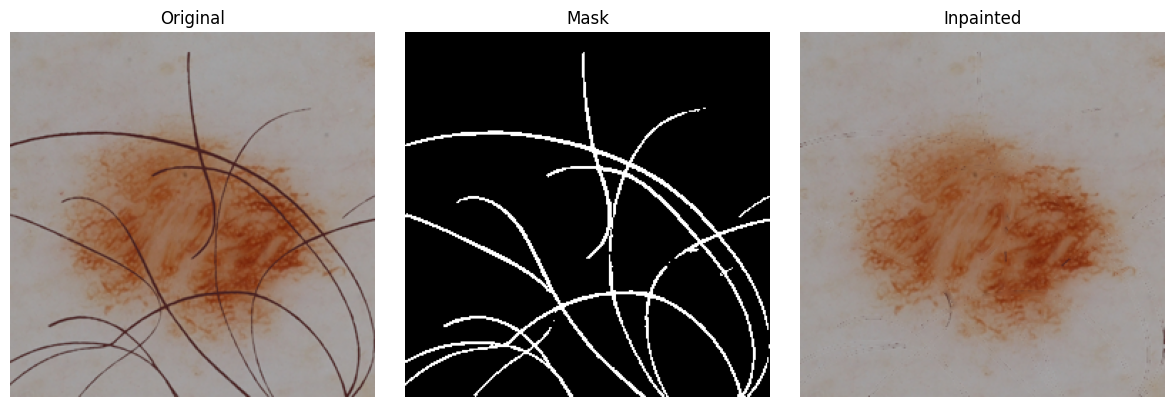

‚úÖ Â∑≤‰øùÂ≠òÔºö./inpainted_results/inpainted_ISIC2019_0031696.jpg


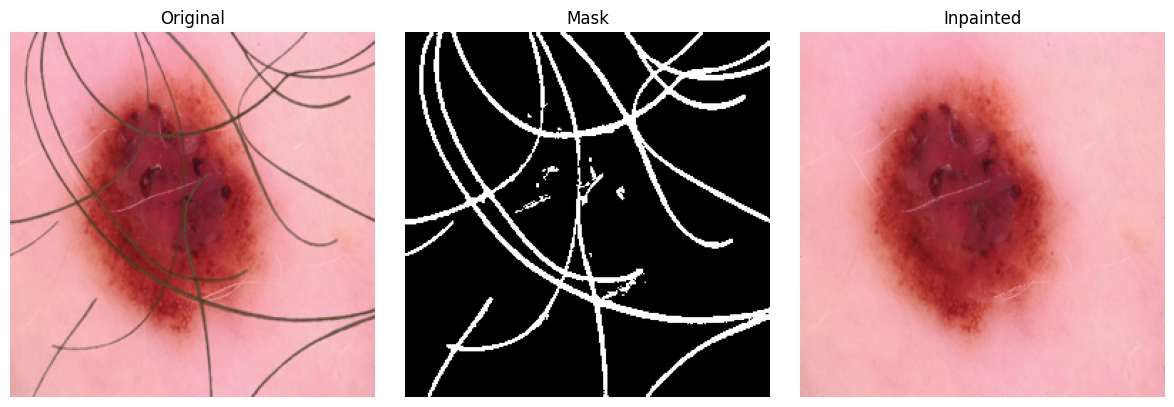

‚úÖ Â∑≤‰øùÂ≠òÔºö./inpainted_results/inpainted_ISIC2019_0028326.jpg


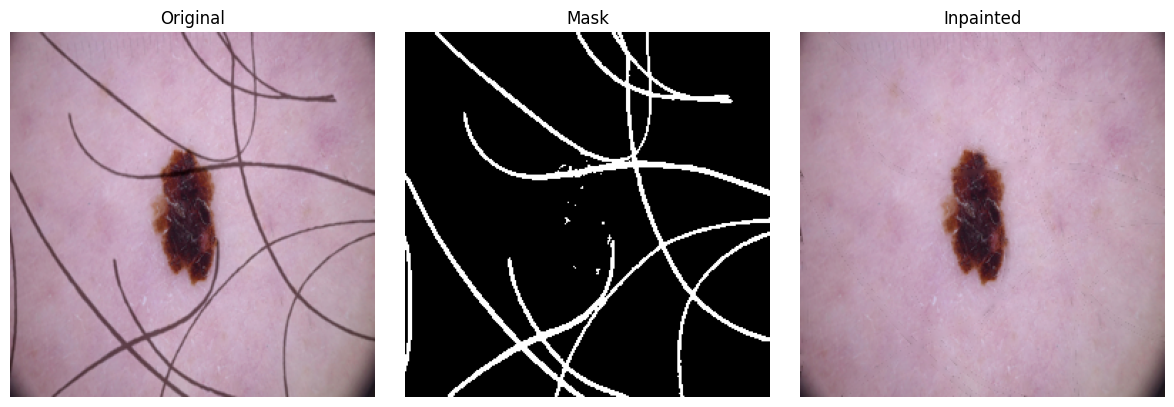

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# ---------- Depthwise Separable Convolution ----------
class SeparableConv2d(nn.Module):
    def __init__(self, in_ch, out_ch, kernel_size=3, padding=1, dilation=1, bias=False):
        super().__init__()
        self.depthwise = nn.Conv2d(in_ch, in_ch, kernel_size, 
                                   padding=padding*dilation,
                                   dilation=dilation, 
                                   groups=in_ch, bias=bias)
        self.pointwise = nn.Conv2d(in_ch, out_ch, 1, bias=bias)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x

# ---------- Composite Attention (CBAM + ECA) ----------
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_planes, in_planes//ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes//ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg = self.fc(self.avg_pool(x))
        mx  = self.fc(self.max_pool(x))
        return self.sigmoid(avg + mx)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        padding = kernel_size // 2
        self.conv  = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.conv2 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.conv3 = nn.Conv2d(1, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()
        self.tanh    = nn.Tanh()

    def forward(self, x):
        # Âπ≥ÂùáÊ±†Âåñ & ÊúÄÂ§ßÊ±†Âåñ
        avg = torch.mean(x, dim=1, keepdim=True)
        mx, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg, mx], dim=1)
        x_sigmoid = self.sigmoid(self.conv(x_cat))
        x_tanh    = self.tanh(self.conv2(x_cat))
        x_mul = x_sigmoid * x_tanh
        x_out = self.conv3(x_mul)
        return x_out

class ECALayer(nn.Module):
    def __init__(self, channels, k_size=3):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv = nn.Conv1d(1, 1, k_size, padding=(k_size-1)//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: [B, C, H, W]
        y = self.avg_pool(x).squeeze(-1).transpose(-1, -2)  # [B, C, 1] -> [B, 1, C]
        y = self.conv(y)                                    # [B, 1, C]
        y = self.sigmoid(y).transpose(-1, -2).unsqueeze(-1)  # -> [B, C, 1, 1]
        return x * y.expand_as(x)

class CompositeAttention(nn.Module):
    def __init__(self, channels, reduction=8, k_size=3):
        super().__init__()
        self.ca  = ChannelAttention(channels, ratio=reduction)
        self.sa  = SpatialAttention()
        self.eca = ECALayer(channels, k_size)
    def forward(self, x):
        x = x * self.ca(x)
        x = x * self.sa(x)
        x = self.eca(x)
        return x

# ---------- Atrous Spatial Pyramid Pooling (ASPP) ----------
class ASPP(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 1)
        self.conv2 = nn.Conv2d(in_ch, out_ch, 3, padding=6, dilation=6)
        self.conv3 = nn.Conv2d(in_ch, out_ch, 3, padding=12, dilation=12)
        self.conv4 = nn.Conv2d(in_ch, out_ch, 3, padding=18, dilation=18)
        self.pool  = nn.AdaptiveAvgPool2d(1)
        self.pool_conv = nn.Conv2d(in_ch, out_ch, 1)
        self.out   = nn.Conv2d(out_ch*5, out_ch, 1)
        self.bn    = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x4 = self.conv4(x)
        x5 = self.pool(x)                         # [B, in_ch, 1, 1]
        x5 = self.pool_conv(x5)                   # [B, out_ch, 1, 1]
        x5 = F.interpolate(x5, size=x4.shape[2:], mode='bilinear', align_corners=False)
        x  = torch.cat([x1, x2, x3, x4, x5], dim=1)  # [B, out_ch*5, H, W]
        x  = self.out(x)
        x  = self.bn(x)
        return self.relu(x)

# ---------- Âü∫Á°ÄÂç∑ÁßØÊ®°ÂùóÔºöÂ∏¶ Attention ÁöÑÂèØÂàÜÁ¶ªÂç∑ÁßØ + BN + ReLU ----------
class REBNCONV(nn.Module):
    def __init__(self, in_ch, out_ch, dirate=1):
        super().__init__()
        self.conv = nn.Sequential(
            SeparableConv2d(in_ch, out_ch, kernel_size=3, padding=dirate, dilation=dirate),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
        self.att  = CompositeAttention(out_ch)

    def forward(self, x):
        x = self.conv(x)
        return self.att(x)

# ---------- Âü∫Á°ÄÂç∑ÁßØÊ®°ÂùóÔºö‰∏çÂ∏¶ Attention ÁöÑÂèØÂàÜÁ¶ªÂç∑ÁßØ + BN + ReLU ----------
class REBNCONV_NoAtt(nn.Module):
    def __init__(self, in_ch, out_ch, dirate=1):
        super().__init__()
        self.conv = nn.Sequential(
            SeparableConv2d(in_ch, out_ch, kernel_size=3, padding=dirate, dilation=dirate),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

# =========================================
#   Â∞Ü RSU7 Ê®°ÂùóÊõøÊç¢‰∏∫ UNet3+ È£éÊ†ºËÅöÂêà
# =========================================
class RSU7_3Plus(nn.Module):
    """
    Depth=7 ÁöÑ UNet3+ Ê†∑ÂºèËÅöÂêàÂùó„ÄÇÁºñÁ†ÅÈÉ®ÂàÜ‰øùÁïô‰∏éÂéü RSU7 ‰∏ÄËá¥ÁöÑÂ±ÇÊ¨°ÁªìÊûÑÔºå
    ÊúÄÂêé‰∏ÄÊ≠•Âú®ÊúÄÈ´òÂàÜËæ®ÁéáÔºàÂØπÂ∫î f0_0Ôºâ‰∏äÔºåÂ∞ÜÊâÄÊúâÂ∞∫Â∫¶ f0~f7 ‰∏äÈááÊ†∑/ÂØπÈΩêÂêé
    ÈÄöËøá 3x3 Conv+BN+ReLU ÊäïÂΩ±Âà∞Âêå‰∏Ä mid_chÔºåÂÜçÁ∫ßËÅî + 3x3 Conv+BN+ReLUÔºåÊúÄÂêéÂä†ÊÆãÂ∑Æ„ÄÇ
    """
    def __init__(self, in_ch, mid_ch, out_ch):
        super().__init__()

        # -------- 1) ÁºñÁ†ÅÂô® Conv Block --------
        # f0_0: ËæìÂÖ• ‚Üí REBNCONV(in_ch ‚Üí out_ch)
        self.enc0 = REBNCONV(in_ch, out_ch)
        # f1_0: out_ch ‚Üí mid_ch
        self.enc1 = REBNCONV(out_ch, mid_ch)
        self.pool1 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f2_0: mid_ch ‚Üí mid_ch
        self.enc2 = REBNCONV(mid_ch, mid_ch)
        self.pool2 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f3_0: mid_ch ‚Üí mid_ch
        self.enc3 = REBNCONV(mid_ch, mid_ch)
        self.pool3 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f4_0: mid_ch ‚Üí mid_ch
        self.enc4 = REBNCONV(mid_ch, mid_ch)
        self.pool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f5_0: mid_ch ‚Üí mid_ch
        self.enc5 = REBNCONV(mid_ch, mid_ch)
        self.pool5 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f6_0: mid_ch ‚Üí mid_ch
        self.enc6 = REBNCONV(mid_ch, mid_ch)
        self.pool6 = nn.MaxPool2d(2, stride=2, ceil_mode=True)
        # f7_0 (bottleneck): mid_ch ‚Üí mid_ch
        self.enc7 = REBNCONV(mid_ch, mid_ch)

        # -------- 2) UNet3+ È£éÊ†ºÁöÑÂÖ®Â∞∫Â∫¶ËÅöÂêàÂç∑ÁßØ --------
        # ‰∏∫‰∫ÜÂ∞ÜÊâÄÊúâÂ∞∫Â∫¶ f0~f7 ÁöÑÁâπÂæÅÂØπÈΩêÂà∞ f0 ÁöÑÂàÜËæ®ÁéáÔºåÈúÄË¶ÅÂØπÊØè‰∏™ÁâπÂæÅÂÅö‰∏Ä‰∏™ 3x3 Conv+BN+ReLU
        # ÁÑ∂ÂêéÂú®ÈÄöÈÅìÁª¥Â∫¶ÊãºÊé•ÔºåÊúÄÂêé 3x3 Conv + BN + ReLU ËæìÂá∫ out_chÔºåÂπ∂Âä†ÊÆãÂ∑Æ f0„ÄÇ

        # ÂØπ f0 (ÈÄöÈÅì out_ch) ÂÅöÊäïÂΩ± ‚Üí mid_ch
        self.conv_scale0 = nn.Sequential(
            nn.Conv2d(out_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        # ÂØπ f1~f7 (ÈÄöÈÅì mid_ch) ÂÅöÊäïÂΩ± ‚Üí mid_ch
        self.conv_scale1 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale2 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale3 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale4 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale5 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale6 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )
        self.conv_scale7 = nn.Sequential(
            nn.Conv2d(mid_ch, mid_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True)
        )

        # ÊúÄÁªàÊãºÊé•ÂêéÈÄöÈÅìÊï∞ = mid_ch * 8ÔºåËæìÂá∫ out_ch
        self.final_conv = nn.Sequential(
            nn.Conv2d(mid_ch * 8, out_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # -------- 1) ÁºñÁ†ÅÈò∂ÊÆµ (0th Âàó)Ôºö ËÆ°ÁÆó f0~f7 --------
        f0 = self.enc0(x)                   # [B, out_ch, H,   W]
        f1 = self.enc1(self.pool1(f0))      # [B, mid_ch, H/2, W/2]
        f2 = self.enc2(self.pool2(f1))      # [B, mid_ch, H/4, W/4]
        f3 = self.enc3(self.pool3(f2))      # [B, mid_ch, H/8, W/8]
        f4 = self.enc4(self.pool4(f3))      # [B, mid_ch, H/16,W/16]
        f5 = self.enc5(self.pool5(f4))      # [B, mid_ch, H/32,W/32]
        f6 = self.enc6(self.pool6(f5))      # [B, mid_ch, H/64,W/64]
        f7 = self.enc7(self.pool6(f6))      # [B, mid_ch, H/64,W/64] ÔºàÂÜçÊ¨°Ê±†ÂåñÊàñ‰øùÊåÅÂêåÊ†∑Â∞∫Â∫¶ÈÉΩË°åÔºâ

        # -------- 2) ÂÖ®Â∞∫Â∫¶ËÅöÂêà (UNet3+ Ê†∑Âºè) --------
        # ÁõÆÊ†áÂàÜËæ®Áéá = f0.shape[2:], Âç≥ÊúÄÊµÖÂ±ÇÁöÑ HxW
        target_size = f0.shape[2:]  # (H, W)

        # Â∞Ü f0~f7 ÂùáÂØπÈΩêÂà∞ target_size
        # ÊäïÂΩ±ÂêéÈÉΩÂèò‰∏∫ [B, mid_ch, H, W]
        fs = [f0, f1, f2, f3, f4, f5, f6, f7]
        processed = []
        for idx, feat in enumerate(fs):
            # ‰∏ä/‰∏ãÈááÊ†∑Âà∞ f0 ÁöÑÂàÜËæ®Áéá
            if feat.shape[2:] != target_size:
                feat_up = F.interpolate(feat, size=target_size, 
                                        mode='bilinear', align_corners=False)
            else:
                feat_up = feat
            # ÂÖàÂÅöÈÄöÈÅìÊäïÂΩ±
            if idx == 0:
                p = self.conv_scale0(feat_up)  # ËæìÂÖ•ÈÄöÈÅìÔºöout_ch ‚Üí mid_ch
            else:
                # f1~f7 ÈÉΩÊòØ mid_ch ‚Üí mid_ch
                p = getattr(self, f"conv_scale{idx}")(feat_up)
            processed.append(p)

        # Âú®ÈÄöÈÅìÁª¥Â∫¶ÊãºÊé•
        x_cat = torch.cat(processed, dim=1)  # [B, mid_ch*8, H, W]
        x_out = self.final_conv(x_cat)       # [B, out_ch, H, W]

        # Âä†ÊÆãÂ∑Æ f0Ôºà‰∏éÂéü RSU7 ‰øùÊåÅ‰∏ÄËá¥ËÆæËÆ°Ôºâ
        return x_out + f0

# ==========================
#   ÂÆåÊï¥ÁöÑ U2NET ÊõøÊç¢Áâà
# ==========================
class U2NET_3Plus(nn.Module):
    def __init__(self, in_ch=3, out_ch=1):
        super().__init__()
        # Áî® RSU7_3Plus ÊõøÊç¢ÂéüÊù•ÁöÑ RSU7
        # Âú®ËøôÈáå mid_ch = 32, out_ch = 64 ÂØπÂ∫îÂéüÂßã RSU7 ÁöÑËÆæËÆ°
        self.stage1  = RSU7_3Plus(in_ch, mid_ch=32, out_ch=64)
        self.aspp    = ASPP(64, 64)
        self.outconv = nn.Conv2d(64, out_ch, 1)

    def forward(self, x):
        x = self.stage1(x)      # [B, 64, H, W]
        x = self.aspp(x)        # [B, 64, H, W]
        x = self.outconv(x)     # [B, out_ch, H, W]
        return torch.sigmoid(x)

# ---------- Dice Loss ----------
def dice_loss(pred, target, smooth=1.):
    pred_flat   = pred.contiguous().view(-1)
    target_flat = target.contiguous().view(-1)
    intersection= (pred_flat * target_flat).sum()
    return 1 - (2.*intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)

# ---------- Dataset & Loader ----------
class HairMaskDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform_img=None, transform_mask=None):
        self.image_list = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
        self.image_dir  = image_dir
        self.mask_dir   = mask_dir
        self.transform_img  = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        name = self.image_list[idx]
        img  = Image.open(os.path.join(self.image_dir, name)).convert('RGB')
        msk  = Image.open(os.path.join(self.mask_dir,  name)).convert('L')
        if self.transform_img:  img = self.transform_img(img)
        if self.transform_mask: msk = self.transform_mask(msk)
        return img, msk

# Transforms
transform_img  = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])
transform_mask = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])

# Paths
dirs = {
    'image_dir': "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair",
    'mask_dir' : "/root/autodl-fs/skin_hair_dataset/alignment/mask",
    'save_dir' : "./inpainted_results"
}

# Data
dataset = HairMaskDataset(dirs['image_dir'], dirs['mask_dir'], transform_img, transform_mask)
loader  = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model
model     = U2NET_3Plus(in_ch=3, out_ch=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ËÆ≠ÁªÉ
for epoch in range(100):
    model.train()
    tot_loss = 0
    for imgs, msks in loader:
        imgs, msks = imgs.to(device), msks.to(device)
        preds      = model(imgs)
        loss       = dice_loss(preds, msks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tot_loss  += loss.item()
    print(f"Epoch {epoch+1}: Loss = {tot_loss/len(loader):.4f}")

# ‰øùÂ≠òÊ®°Âûã
os.makedirs("./checkpoints", exist_ok=True)
pth = "./checkpoints/hair_seg_u2net3plus.pth"
torch.save(model.state_dict(), pth)
print(f"Model saved: {pth}")

# ---------- Êé®Êñ≠ & Inpainting ----------
def inpaint_image(path, save_path=None):
    model.eval()
    img      = Image.open(path).convert('RGB').resize((256,256))
    inp      = transform_img(img).unsqueeze(0).to(device)
    with torch.no_grad():
        pred_mask = model(inp).squeeze().cpu().numpy()
    bin_mask = (pred_mask > 0.5).astype(np.uint8) * 255
    img_cv   = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    res      = cv2.inpaint(img_cv, bin_mask, 3, cv2.INPAINT_TELEA)
    if save_path:
        cv2.imwrite(save_path, res)
    return img_cv, bin_mask, res

test_images = ['ISIC2019_0000461.jpg', 'ISIC2019_0031696.jpg', 'ISIC2019_0028326.jpg']
test_dir    = "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair"
save_dir    = "./inpainted_results"
os.makedirs(save_dir, exist_ok=True)

for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    original, mask, inpainted = inpaint_image(img_path, 
                                             save_path=os.path.join(save_dir, f"inpainted_{img_name}"))
    print(f"‚úÖ Â∑≤‰øùÂ≠òÔºö{os.path.join(save_dir, f'inpainted_{img_name}')}")
    # ÂèØËßÜÂåñ
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)); plt.title("Inpainted"); plt.axis("off")
    plt.tight_layout(); plt.show()


In [4]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from sewar.full_ref import uqi

# ---------- 7. ÂõæÂÉèË¥®ÈáèÊåáÊ†áËÆ°ÁÆóÂáΩÊï∞ ----------
def calculate_metrics(pred_img, gt_img):
    pred_img = pred_img.astype(np.float32) / 255.0
    gt_img = gt_img.astype(np.float32) / 255.0

    h, w = pred_img.shape[:2]
    win_size = min(7, h, w)
    if win_size % 2 == 0:
        win_size -= 1

    mse = mean_squared_error(gt_img, pred_img)
    psnr = peak_signal_noise_ratio(gt_img, pred_img, data_range=1.0)
    ssim = structural_similarity(gt_img, pred_img, data_range=1.0, channel_axis=2, win_size=win_size)
    uqi_val = uqi(gt_img, pred_img)

    return mse, psnr, ssim, uqi_val
image_dir = "/root/autodl-fs/skin_hair_dataset/alignment/photo with hair"
original_dir = "/root/autodl-fs/skin_hair_dataset/alignment/oryginal"  # Ê≤°ÊúâÊØõÂèëÁöÑ ground-truth ÂéüÂõæ
image_list = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

# Á¥ØÂä†ÊåáÊ†á
total_mse, total_psnr, total_ssim, total_uqi = 0, 0, 0, 0
valid_count = 0

for img_name in image_list:
    try:
        # Êé®ÁêÜ‰øÆÂ§çÂõæÂÉè
        img_path = os.path.join(image_dir, img_name)
        original, _, inpainted = inpaint_image(img_path)

        # Âä†ËΩΩ ground-truthÔºàÊó†ÊØõÂèëÔºâÂõæÂÉè
        gt_path = os.path.join(original_dir, img_name)
        if not os.path.exists(gt_path):
            print(f"‚ùå ground-truth Áº∫Â§±: {img_name}")
            continue
        gt_img = cv2.imread(gt_path)
        gt_img = cv2.resize(gt_img, (256, 256))

        # ËÆ°ÁÆóÊåáÊ†á
        mse, psnr, ssim, uqi_val = calculate_metrics(inpainted, gt_img)
        total_mse += mse
        total_psnr += psnr
        total_ssim += ssim
        total_uqi += uqi_val
        valid_count += 1
        print(f"‚úÖ {img_name}  |  MSE: {mse:.4f}  PSNR: {psnr:.2f}  SSIM: {ssim:.4f}  UQI: {uqi_val:.4f}")
    except Exception as e:
        print(f"‚ö†Ô∏è Â§ÑÁêÜÂ§±Ë¥• {img_name}Ôºö{str(e)}")

# Âπ≥ÂùáÊåáÊ†áÊâìÂç∞
if valid_count > 0:
    print("\nüìä Âπ≥ÂùáÊåáÊ†áÔºö")
    print(f"  MSE  : {total_mse / valid_count:.6f}")
    print(f"  PSNR : {total_psnr / valid_count:.2f} dB")
    print(f"  SSIM : {total_ssim / valid_count:.4f}")
    print(f"  UQI  : {total_uqi / valid_count:.4f}")
else:
    print("‚ùå Ê≤°ÊúâÊàêÂäüËØÑ‰º∞‰ªª‰ΩïÂõæÂÉè")


‚úÖ ISIC2017_0000026.jpg  |  MSE: 0.0015  PSNR: 28.27  SSIM: 0.9791  UQI: 0.9998
‚úÖ ISIC2017_0000081.jpg  |  MSE: 0.0001  PSNR: 38.55  SSIM: 0.9309  UQI: 0.9998
‚úÖ ISIC2017_0000082.jpg  |  MSE: 0.0001  PSNR: 40.31  SSIM: 0.9465  UQI: 0.9990
‚úÖ ISIC2017_0000147.jpg  |  MSE: 0.0004  PSNR: 34.16  SSIM: 0.9307  UQI: 0.9985
‚úÖ ISIC2017_0000150.jpg  |  MSE: 0.0002  PSNR: 37.38  SSIM: 0.9224  UQI: 0.9989
‚úÖ ISIC2017_0000151.jpg  |  MSE: 0.0001  PSNR: 41.20  SSIM: 0.9530  UQI: 0.9994
‚úÖ ISIC2017_0000152.jpg  |  MSE: 0.0002  PSNR: 36.47  SSIM: 0.9261  UQI: 0.9979
‚úÖ ISIC2017_0000153.jpg  |  MSE: 0.0002  PSNR: 38.04  SSIM: 0.9251  UQI: 0.9997
‚úÖ ISIC2017_0000154.jpg  |  MSE: 0.0001  PSNR: 38.61  SSIM: 0.9390  UQI: 0.9995
‚úÖ ISIC2017_0001148.jpg  |  MSE: 0.0001  PSNR: 40.48  SSIM: 0.9553  UQI: 0.9998
‚úÖ ISIC2017_0012137.jpg  |  MSE: 0.0003  PSNR: 35.48  SSIM: 0.9133  UQI: 0.9994
‚úÖ ISIC2017_0015079.jpg  |  MSE: 0.0004  PSNR: 33.76  SSIM: 0.8714  UQI: 0.9964
‚úÖ ISIC2019_0000171.jpg  | 